In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Upload

In [27]:
data = pd.read_csv('Companies and Industry data.csv')
data.sample(10)

,Company,Date,StockPrice,Revenue,Industry
140,boeing,0,316.60,0.07,airlines
338,hyatt,0,85.34,0.10,hospitality
32,agilent technologies inc,1,82.56,0.21,technology
375,jd.com,1,37.69,1.00,consumer services
516,pfizer,1,37.51,0.20,healthcare
277,facebook,1,201.91,0.10,media & entertainment
137,bilibili,1,21.55,1.00,technology
632,wynn resorts,0,123.85,0.73,hospitality
68,american airlines,1,27.16,0.02,airlines
661,zto express,1,22.00,1.00,courier


### Creating Treatment and Pre_post variable

In [28]:
data['ActualDate'] = np.tile(np.arange(7),95)
data['Treatment'] = np.where(data['Revenue'] > 0.40,1, 0)
data['Treatment'].value_counts()
data.head(7)

,Company,Date,StockPrice,Revenue,Industry,ActualDate,Treatment
0,3m,0,175.63,0.1,conglomerates,0,0
1,3m,0,165.58,0.1,conglomerates,1,0
2,3m,0,162.00,0.1,conglomerates,2,0
3,3m,1,162.51,0.1,conglomerates,3,0
4,3m,1,158.66,0.1,conglomerates,4,0
5,3m,1,156.59,0.1,conglomerates,5,0
6,3m,1,157.24,0.1,conglomerates,6,0


In [29]:
data['Treatment_Groups'] = np.where(data['Treatment'] == 1,"% Revenue > 40%", "% Revenue < 40%")
data_pre = data[data.Date==0]
data_post = data[data.Date==1]

### Comparing Parallel Trends

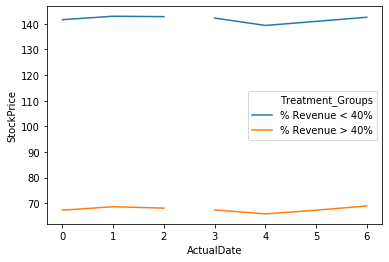

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_2007_2009 = sns.lineplot(x="ActualDate", y="StockPrice", data=data_pre,hue='Treatment_Groups',ci=None)
plot_2016_2018 = sns.lineplot(x="ActualDate", y="StockPrice", data=data_post,hue='Treatment_Groups',ci=None, legend=False)

### Panel OLS

Difference-in-Difference Model

In [31]:
from linearmodels import PanelOLS
df = data.set_index(['Industry','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.0419
Estimator:,PanelOLS,R-squared (Between):,-0.7138
No. Observations:,665,R-squared (Within):,0.0419
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.2154
Time:,17:13:20,Log-likelihood,-4324.3
Cov. Estimator:,Clustered,,
,,F-statistic:,9.3610
Entities:,20,P-value,0.0000
Avg Obs:,33.250,Distribution:,"F(3,642)"
Min Obs:,7.0000,,
Max Obs:,119.00,F-statistic (robust):,7.0406


## Semiconductors Industry

Eg: amd, intel

In [41]:
from linearmodels import PanelOLS
data_industry = data[data["Industry"].isin(["semiconductors"])]
df = data_industry.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.2899
Estimator:,PanelOLS,R-squared (Between):,-0.0190
No. Observations:,70,R-squared (Within):,0.2899
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.0189
Time:,19:20:29,Log-likelihood,-147.36
Cov. Estimator:,Clustered,,
,,F-statistic:,11.840
Entities:,10,P-value,0.0000
Avg Obs:,7.0000,Distribution:,"F(2,58)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,16.731


## Healthcare Industry
Eg: cardinal health, cigna

In [37]:
from linearmodels import PanelOLS
data_industry = data[data["Industry"].isin(["healthcare"])]
df = data_industry.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.2294
Estimator:,PanelOLS,R-squared (Between):,-0.0141
No. Observations:,56,R-squared (Within):,0.2294
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.0140
Time:,19:18:51,Log-likelihood,-106.14
Cov. Estimator:,Clustered,,
,,F-statistic:,6.8450
Entities:,8,P-value,0.0025
Avg Obs:,7.0000,Distribution:,"F(2,46)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,1.8198


## Food industry
Eg: Mcdonalds, starbucks

In [38]:
from linearmodels import PanelOLS
data_industry = data[data["Industry"].isin(["food"])]
df = data_industry.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.2422
Estimator:,PanelOLS,R-squared (Between):,-0.0010
No. Observations:,56,R-squared (Within):,0.2422
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.0010
Time:,19:18:59,Log-likelihood,-98.703
Cov. Estimator:,Clustered,,
,,F-statistic:,7.3524
Entities:,8,P-value,0.0017
Avg Obs:,7.0000,Distribution:,"F(2,46)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,3.5657


## Manufacturing Industry
Eg: applied materials, cummins inc

In [39]:
from linearmodels import PanelOLS
data_industry = data[data["Industry"].isin(["manufacturing"])]
df = data_industry.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.1882
Estimator:,PanelOLS,R-squared (Between):,-0.0151
No. Observations:,49,R-squared (Within):,0.1882
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.0150
Time:,19:19:06,Log-likelihood,-163.29
Cov. Estimator:,Clustered,,
,,F-statistic:,4.6366
Entities:,7,P-value,0.0155
Avg Obs:,7.0000,Distribution:,"F(2,40)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,1.0156


## Conglomerates
Eg: 3M, philips

In [43]:
from linearmodels import PanelOLS
data_industry = data[data["Industry"].isin(["conglomerates"])]
df = data_industry.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,StockPrice,R-squared:,0.2159
Estimator:,PanelOLS,R-squared (Between):,-0.0268
No. Observations:,28,R-squared (Within):,0.2159
Date:,"Tue, Apr 28 2020",R-squared (Overall):,-0.0266
Time:,19:22:20,Log-likelihood,-69.334
Cov. Estimator:,Clustered,,
,,F-statistic:,3.0290
Entities:,4,P-value,0.0689
Avg Obs:,7.0000,Distribution:,"F(2,22)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,1.2017
